In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
#input data
x=df[['Age','EstimatedSalary']]
#output data
y=df['Purchased']

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [6]:
#cross. validation
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,random_state=0,test_size=0.2)

In [8]:
x_train

array([[0.95238095, 0.95555556],
       [0.97619048, 0.5037037 ],
       [0.14285714, 0.2962963 ],
       [0.19047619, 0.14814815],
       [0.95238095, 0.17037037],
       [0.57142857, 0.48148148],
       [0.52380952, 0.44444444],
       [0.97619048, 0.85185185],
       [0.66666667, 0.19259259],
       [0.54761905, 0.33333333],
       [0.57142857, 0.36296296],
       [0.45238095, 0.97037037],
       [0.11904762, 0.24444444],
       [0.16666667, 0.13333333],
       [0.14285714, 0.51111111],
       [0.21428571, 0.6       ],
       [0.11904762, 0.35555556],
       [0.71428571, 0.13333333],
       [0.71428571, 0.55555556],
       [0.57142857, 0.65925926],
       [0.61904762, 0.17777778],
       [0.33333333, 0.77777778],
       [0.47619048, 0.25925926],
       [0.33333333, 0.88888889],
       [0.80952381, 0.04444444],
       [0.83333333, 0.65925926],
       [0.5       , 0.2       ],
       [0.47619048, 0.34074074],
       [0.42857143, 0.25925926],
       [0.42857143, 0.35555556],
       [0.

In [9]:
y_train

336    1
64     0
55     0
106    0
300    1
      ..
323    1
192    0
117    0
47     0
172    0
Name: Purchased, Length: 320, dtype: int64

In [10]:
from sklearn.linear_model import LogisticRegression

<Axes: xlabel='Purchased', ylabel='count'>

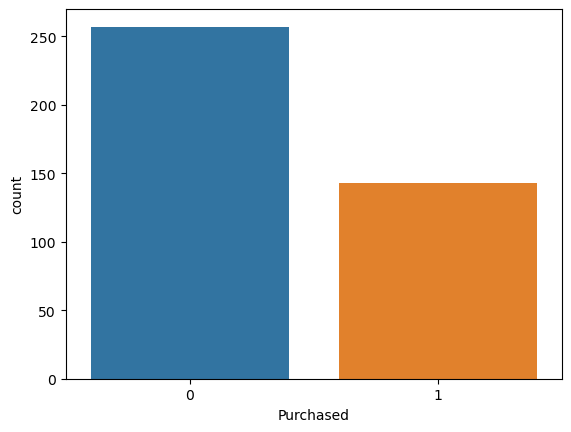

In [11]:
import seaborn as sns
sns.countplot(x=y)

In [12]:
y.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [13]:
#creat the object
classifier = LogisticRegression()

In [14]:
classifier.fit(x_train,y_train)

LogisticRegression()

In [15]:
#predication
y_pred = classifier.predict(x_test)

In [16]:
y_train.shape

(320,)

In [17]:
x_train.shape

(320, 2)

In [18]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [19]:
y_test

132    0
309    0
341    0
196    0
246    0
      ..
14     0
363    0
304    0
361    1
329    1
Name: Purchased, Length: 80, dtype: int64

In [20]:
import matplotlib.pyplot as plt

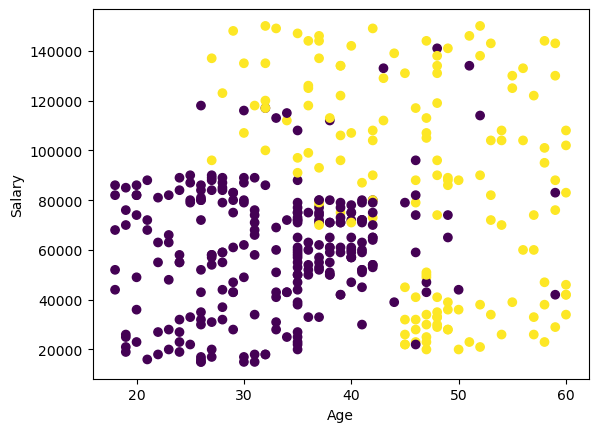

In [21]:
plt.xlabel('Age')
plt.ylabel('Salary')
plt.scatter(x['Age'],x['EstimatedSalary'],c=y)

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [23]:
confusion_matrix(y_test,y_pred)

array([[58,  0],
       [ 6, 16]])

In [24]:
y_test.value_counts()

0    58
1    22
Name: Purchased, dtype: int64

In [25]:
cm=confusion_matrix(y_test, y_pred)

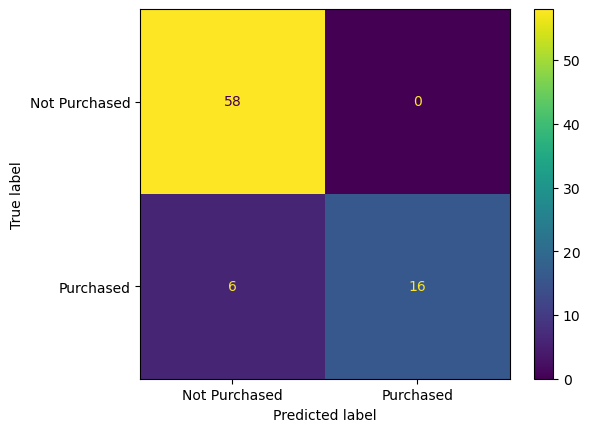

In [26]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Purchased", "Purchased"])
disp.plot()

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.925

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        58
           1       1.00      0.73      0.84        22

    accuracy                           0.93        80
   macro avg       0.95      0.86      0.90        80
weighted avg       0.93      0.93      0.92        80



In [30]:
new1=[[26,34000]]
new2=[[57,138000]]

In [31]:
classifier.predict(scaler.transform(new1))

/home/rllab4/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([0])

In [32]:
classifier.predict(scaler.transform(new2))

/home/rllab4/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([1])